In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report, recall_score

import joblib
import warnings

df = pd.read_csv('sentiAnalysis.csv')  # Replace with the actual path to your training set

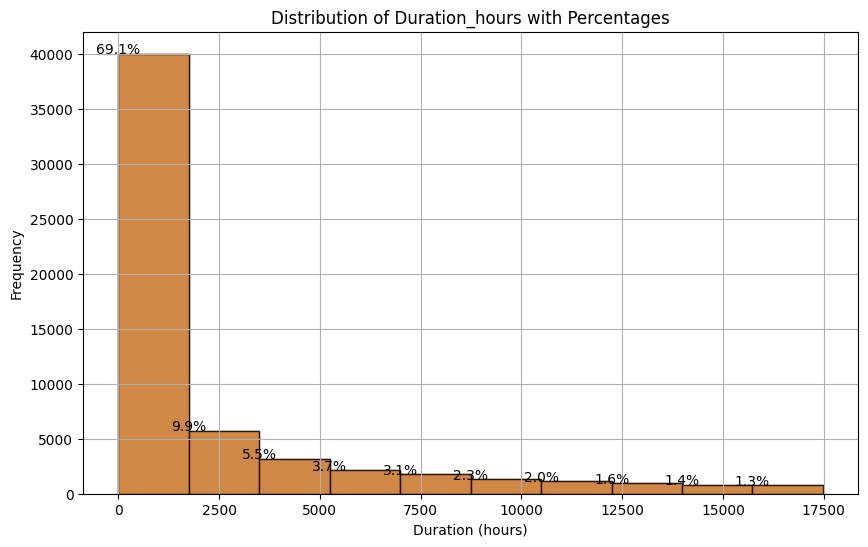

In [3]:
import matplotlib.pyplot as plt

# Plotting the distribution
plt.figure(figsize=(10, 6))

# Calculate frequencies and bins
counts, bins, _ = plt.hist(df['Duration_hours'], bins=10, edgecolor='black', alpha=0.7)

# Calculate percentages for each bin
percentages = [(count / len(df)) * 100 for count in counts]

# Plot histogram
plt.hist(df['Duration_hours'], bins=10, edgecolor='black', alpha=0.7)

# Add percentages as annotations
for i, count in enumerate(counts):
    plt.text(bins[i] + 0.15, count + 0.5, f'{percentages[i]:.1f}%', fontsize=10, ha='center')

plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration_hours with Percentages')
plt.grid(True)
plt.show()


In [31]:
threshold = df['Duration_hours'].quantile(0.75)

# Create a new column TimeLabel based on the threshold
df['TimeLabel'] = df['Duration_hours'].apply(lambda x: 'short' if x <= threshold else 'long')
df2 = df[df['Resolution'] == 'FIXED']

In [52]:
import numpy as np
def MLPmodel(df, input_columns, target_column, test_size=0.20, max_features=1000, hidden_layer_sizes=(64, 32), activation='relu', max_iter=100, random_state=42):
    #Train and test a MLP model

    # Combine input columns into a single text feature
    X = df[input_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
    y = df[target_column]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Vectorize the text data
    vectorizer = TfidfVectorizer(max_features=max_features)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Initialize and train the MLPClassifier
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, max_iter=max_iter, random_state=random_state)
    model.fit(X_train_vec, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_vec)
    df['predictions'] = pd.Series(y_pred, index=X_test.index)
    
    # Calculate metrics using y_test and y_pred
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(report)

    return df

In [56]:
dataframe1 = MLPmodel(df, ['Emotion', 'Priority'], 'TimeLabel')
dataframe2 = MLPmodel(df, ['Emotion', 'Priority', 'Emotionality'], 'TimeLabel')

Accuracy: 0.74
F1 Score: 0.66
Precision: 0.75
Recall: 0.74
              precision    recall  f1-score   support

        long       0.77      0.08      0.15      3188
       short       0.74      0.99      0.85      8382

    accuracy                           0.74     11570
   macro avg       0.76      0.54      0.50     11570
weighted avg       0.75      0.74      0.66     11570

Accuracy: 0.73
F1 Score: 0.65
Precision: 0.68
Recall: 0.73
              precision    recall  f1-score   support

        long       0.54      0.10      0.17      3188
       short       0.74      0.97      0.84      8382

    accuracy                           0.73     11570
   macro avg       0.64      0.53      0.50     11570
weighted avg       0.68      0.73      0.65     11570



In [57]:
dataframe1

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,Duration_hours,TimeLabel,Pos_Score,Neg_Score,Emotion,Emotionality,Destiny,predictions
0,2,P5,Team,NaN,Opening repository resources doesnt honor type...,open repository resource always open default t...,RESOLVED,FIXED,2.0,2001-10-11 01:34:00+00:00,2002-05-07 14:33:56+00:00,5004.983333,long,0.020833,0.056818,negative,0.077652,Fixed,NaN
1,4,P5,Team,NaN,need better error message if catching up over ...,- become synchronize project repository ; - us...,RESOLVED,FIXED,2.0,2001-10-11 01:34:00+00:00,2002-03-01 21:27:31+00:00,3403.883333,long,0.049342,0.092105,negative,0.141447,Fixed,NaN
2,6,P5,Team,NaN,API - IResource.setLocal has problems (1G5TC8L),iresource.setlocal problems . method ( which r...,RESOLVED,INVALID,2.0,2001-10-11 01:34:00+00:00,2002-02-07 21:29:37+00:00,2875.916667,long,0.042969,0.050781,negative,0.093750,Not Fixed,NaN
3,9,P3,Team,NaN,VCM Implementation - disallow root resource to...,implementation change root resource might pass...,RESOLVED,WONTFIX,2.0,2001-10-11 01:34:00+00:00,2001-10-24 03:39:17+00:00,314.083333,short,0.034091,0.056818,negative,0.090909,Not Fixed,NaN
4,11,P3,Team,NaN,API: ISharingManager::load mapping vcm project...,jean-michel ( 08/02/2001 1:38:48 pm ) ; ; isha...,RESOLVED,WONTFIX,2.0,2001-10-11 01:34:00+00:00,2001-10-24 03:39:22+00:00,314.083333,short,0.035937,0.018750,positive,0.054688,Not Fixed,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57845,229777,P3,UI,NaN,[Viewers] Wrong argument in the first statemen...,build id : 3.3 ( i sure mean build id ; 3.3 ec...,RESOLVED,FIXED,3.3,2008-05-01 13:47:00+00:00,2008-05-10 14:06:07+00:00,216.316667,short,0.064024,0.027439,positive,0.091463,Fixed,NaN
57846,229779,P3,UI,NaN,NPE in performance tests,several npes within ui session test prevent ru...,VERIFIED,FIXED,3.4,2008-05-01 13:52:00+00:00,2008-05-20 14:12:14+00:00,456.333333,short,0.033333,0.033333,negative,0.066667,Fixed,NaN
57847,229782,P3,UI,NaN,Performance tests for ICU Collator,i20080501-0100 ; ; use collator ( see dependan...,VERIFIED,FIXED,3.4,2008-05-01 14:05:00+00:00,2009-06-01 18:25:12+00:00,9508.333333,long,0.025000,0.000000,positive,0.025000,Fixed,NaN
57848,229789,P3,UI,NaN,[Examples] examples plugins create duplicate m...,create attachment 98318 ; screenshot ; ; i2008...,VERIFIED,FIXED,3.4,2008-05-01 15:02:00+00:00,2008-05-31 01:57:57+00:00,706.916667,short,0.092105,0.013158,positive,0.105263,Fixed,NaN


In [34]:
MLPmodel(df, ['Emotion'], 'TimeLabel')
MLPmodel(df, ['Emotion', 'Priority'], 'TimeLabel')
MLPmodel(df, ['Emotion', 'Priority', 'Emotionality'], 'TimeLabel')
MLPmodel(df, ['Priority'], 'TimeLabel')
MLPmodel(df, ['Emotionality'], 'TimeLabel')
MLPmodel(df, ['Emotionality', 'Priority'], 'TimeLabel')

/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Accuracy: 0.73
F1 Score: 0.61
Precision: 0.53
Recall: 0.73
              precision    recall  f1-score   support

        long       0.00      0.00      0.00     12685
       short       0.73      1.00      0.84     33595

    accuracy                           0.73     46280
   macro avg       0.36      0.50      0.42     46280
weighted avg       0.53      0.73      0.61     46280

Accuracy: 0.74
F1 Score: 0.65
Precision: 0.75
Recall: 0.74
              precision    recall  f1-score   support

        long       0.77      0.08      0.14     12685
       short       0.74      0.99      0.85     33595

    accuracy                           0.74     46280
   macro avg       0.75      0.53      0.50     46280
weighted avg       0.75      0.74      0.65     46280



/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.71
F1 Score: 0.65
Precision: 0.64
Recall: 0.71
              precision    recall  f1-score   support

        long       0.40      0.12      0.18     12685
       short       0.74      0.93      0.82     33595

    accuracy                           0.71     46280
   macro avg       0.57      0.53      0.50     46280
weighted avg       0.64      0.71      0.65     46280

Accuracy: 0.74
F1 Score: 0.65
Precision: 0.75
Recall: 0.74
              precision    recall  f1-score   support

        long       0.77      0.08      0.14     12685
       short       0.74      0.99      0.85     33595

    accuracy                           0.74     46280
   macro avg       0.75      0.53      0.50     46280
weighted avg       0.75      0.74      0.65     46280



/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.71
F1 Score: 0.62
Precision: 0.60
Recall: 0.71
              precision    recall  f1-score   support

        long       0.28      0.03      0.06     12685
       short       0.73      0.97      0.83     33595

    accuracy                           0.71     46280
   macro avg       0.50      0.50      0.45     46280
weighted avg       0.60      0.71      0.62     46280



/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.72
F1 Score: 0.65
Precision: 0.66
Recall: 0.72
              precision    recall  f1-score   support

        long       0.46      0.11      0.17     12685
       short       0.74      0.95      0.83     33595

    accuracy                           0.72     46280
   macro avg       0.60      0.53      0.50     46280
weighted avg       0.66      0.72      0.65     46280



MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

In [59]:
df2 = df[df['Destiny'] == 'Fixed'].copy()
df2

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,Duration_hours,TimeLabel,Pos_Score,Neg_Score,Emotion,Emotionality,Destiny,predictions
0,2,P5,Team,NaN,Opening repository resources doesnt honor type...,open repository resource always open default t...,RESOLVED,FIXED,2.0,2001-10-11 01:34:00+00:00,2002-05-07 14:33:56+00:00,5004.983333,long,0.020833,0.056818,negative,0.077652,Fixed,NaN
1,4,P5,Team,NaN,need better error message if catching up over ...,- become synchronize project repository ; - us...,RESOLVED,FIXED,2.0,2001-10-11 01:34:00+00:00,2002-03-01 21:27:31+00:00,3403.883333,long,0.049342,0.092105,negative,0.141447,Fixed,NaN
6,13,P3,Team,NaN,CC Discussion: local versioning (1GAT3PL),would make sense ( the ? ) project version men...,VERIFIED,FIXED,2.0,2001-10-11 01:34:00+00:00,2001-10-29 21:51:09+00:00,452.283333,short,0.036232,0.020833,positive,0.057065,Fixed,long
9,16,P5,Team,NaN,auto-merge button (1GBBEBB),merge view ; id like auto-merge button semanti...,RESOLVED,FIXED,2.0,2001-10-11 01:35:00+00:00,2002-02-08 19:43:37+00:00,2898.133333,long,0.032143,0.028571,positive,0.060714,Fixed,NaN
10,17,P5,Team,NaN,look at gender change cases (1GBCX61),need look gender change case ; give path ; - w...,RESOLVED,FIXED,2.0,2001-10-11 01:35:00+00:00,2002-05-24 01:20:53+00:00,5399.750000,long,0.020833,0.044643,negative,0.065476,Fixed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57844,229776,P3,SWT,NaN,SWT.TOGGLE style bit stops setRegion from work...,swt.jar i20080429-0100 build ; setregion still...,RESOLVED,FIXED,3.4,2008-05-01 13:32:00+00:00,2008-05-05 21:13:32+00:00,103.683333,short,0.058824,0.022059,positive,0.080882,Fixed,NaN
57845,229777,P3,UI,NaN,[Viewers] Wrong argument in the first statemen...,build id : 3.3 ( i sure mean build id ; 3.3 ec...,RESOLVED,FIXED,3.3,2008-05-01 13:47:00+00:00,2008-05-10 14:06:07+00:00,216.316667,short,0.064024,0.027439,positive,0.091463,Fixed,NaN
57846,229779,P3,UI,NaN,NPE in performance tests,several npes within ui session test prevent ru...,VERIFIED,FIXED,3.4,2008-05-01 13:52:00+00:00,2008-05-20 14:12:14+00:00,456.333333,short,0.033333,0.033333,negative,0.066667,Fixed,NaN
57847,229782,P3,UI,NaN,Performance tests for ICU Collator,i20080501-0100 ; ; use collator ( see dependan...,VERIFIED,FIXED,3.4,2008-05-01 14:05:00+00:00,2009-06-01 18:25:12+00:00,9508.333333,long,0.025000,0.000000,positive,0.025000,Fixed,NaN


In [60]:
MLPmodel(df2, ['Emotion'], 'TimeLabel')
MLPmodel(df2, ['Emotion', 'Priority'], 'TimeLabel')
MLPmodel(df2, ['Emotion', 'Priority', 'Emotionality'], 'TimeLabel')
MLPmodel(df2, ['Priority'], 'TimeLabel')
MLPmodel(df2, ['Emotionality'], 'TimeLabel')
MLPmodel(df2, ['Emotionality', 'Priority'], 'TimeLabel')


/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Accuracy: 0.74
F1 Score: 0.63
Precision: 0.55
Recall: 0.74
              precision    recall  f1-score   support

        long       0.00      0.00      0.00      1547
       short       0.74      1.00      0.85      4465

    accuracy                           0.74      6012
   macro avg       0.37      0.50      0.43      6012
weighted avg       0.55      0.74      0.63      6012

Accuracy: 0.75
F1 Score: 0.66
Precision: 0.75
Recall: 0.75
              precision    recall  f1-score   support

        long       0.76      0.05      0.09      1547
       short       0.75      0.99      0.86      4465

    accuracy                           0.75      6012
   macro avg       0.76      0.52      0.47      6012
weighted avg       0.75      0.75      0.66      6012



/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.72
F1 Score: 0.65
Precision: 0.64
Recall: 0.72
              precision    recall  f1-score   support

        long       0.34      0.08      0.13      1547
       short       0.75      0.95      0.84      4465

    accuracy                           0.72      6012
   macro avg       0.54      0.51      0.48      6012
weighted avg       0.64      0.72      0.65      6012

Accuracy: 0.75
F1 Score: 0.66
Precision: 0.75
Recall: 0.75
              precision    recall  f1-score   support

        long       0.76      0.05      0.09      1547
       short       0.75      0.99      0.86      4465

    accuracy                           0.75      6012
   macro avg       0.76      0.52      0.47      6012
weighted avg       0.75      0.75      0.66      6012

Accuracy: 0.73
F1 Score: 0.64
Precision: 0.62
Recall: 0.73
              precision    recall  f1-score   support

        long       0.27      0.02      0.04      1547
       short       0.74      0.98      0.84      4465

    a

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,Duration_hours,TimeLabel,Pos_Score,Neg_Score,Emotion,Emotionality,Destiny,predictions
0,2,P5,Team,NaN,Opening repository resources doesnt honor type...,open repository resource always open default t...,RESOLVED,FIXED,2.0,2001-10-11 01:34:00+00:00,2002-05-07 14:33:56+00:00,5004.983333,long,0.020833,0.056818,negative,0.077652,Fixed,NaN
1,4,P5,Team,NaN,need better error message if catching up over ...,- become synchronize project repository ; - us...,RESOLVED,FIXED,2.0,2001-10-11 01:34:00+00:00,2002-03-01 21:27:31+00:00,3403.883333,long,0.049342,0.092105,negative,0.141447,Fixed,NaN
6,13,P3,Team,NaN,CC Discussion: local versioning (1GAT3PL),would make sense ( the ? ) project version men...,VERIFIED,FIXED,2.0,2001-10-11 01:34:00+00:00,2001-10-29 21:51:09+00:00,452.283333,short,0.036232,0.020833,positive,0.057065,Fixed,NaN
9,16,P5,Team,NaN,auto-merge button (1GBBEBB),merge view ; id like auto-merge button semanti...,RESOLVED,FIXED,2.0,2001-10-11 01:35:00+00:00,2002-02-08 19:43:37+00:00,2898.133333,long,0.032143,0.028571,positive,0.060714,Fixed,NaN
10,17,P5,Team,NaN,look at gender change cases (1GBCX61),need look gender change case ; give path ; - w...,RESOLVED,FIXED,2.0,2001-10-11 01:35:00+00:00,2002-05-24 01:20:53+00:00,5399.750000,long,0.020833,0.044643,negative,0.065476,Fixed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57844,229776,P3,SWT,NaN,SWT.TOGGLE style bit stops setRegion from work...,swt.jar i20080429-0100 build ; setregion still...,RESOLVED,FIXED,3.4,2008-05-01 13:32:00+00:00,2008-05-05 21:13:32+00:00,103.683333,short,0.058824,0.022059,positive,0.080882,Fixed,short
57845,229777,P3,UI,NaN,[Viewers] Wrong argument in the first statemen...,build id : 3.3 ( i sure mean build id ; 3.3 ec...,RESOLVED,FIXED,3.3,2008-05-01 13:47:00+00:00,2008-05-10 14:06:07+00:00,216.316667,short,0.064024,0.027439,positive,0.091463,Fixed,NaN
57846,229779,P3,UI,NaN,NPE in performance tests,several npes within ui session test prevent ru...,VERIFIED,FIXED,3.4,2008-05-01 13:52:00+00:00,2008-05-20 14:12:14+00:00,456.333333,short,0.033333,0.033333,negative,0.066667,Fixed,NaN
57847,229782,P3,UI,NaN,Performance tests for ICU Collator,i20080501-0100 ; ; use collator ( see dependan...,VERIFIED,FIXED,3.4,2008-05-01 14:05:00+00:00,2009-06-01 18:25:12+00:00,9508.333333,long,0.025000,0.000000,positive,0.025000,Fixed,NaN


In [ ]:
MLPmodel(df, ['Emotion'], 'Destiny')
MLPmodel(df, ['Emotion', 'Priority'], 'Destiny')
MLPmodel(df, ['Emotion', 'Priority', 'Emotionality'], 'Destiny')
MLPmodel(df, ['Priority'], 'Destiny')
MLPmodel(df, ['Emotionality'], 'Destiny')
MLPmodel(df, ['Emotionality', 'Priority'], 'Destiny')


/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Accuracy: 0.52
F1 Score: 0.35
Precision: 0.27
Recall: 0.52
              precision    recall  f1-score   support

       Fixed       0.52      1.00      0.68      5976
   Not Fixed       0.00      0.00      0.00      5594

    accuracy                           0.52     11570
   macro avg       0.26      0.50      0.34     11570
weighted avg       0.27      0.52      0.35     11570

Accuracy: 0.54
F1 Score: 0.46
Precision: 0.64
Recall: 0.54
              precision    recall  f1-score   support

       Fixed       0.76      0.16      0.26      5976
   Not Fixed       0.51      0.95      0.67      5594

    accuracy                           0.54     11570
   macro avg       0.64      0.55      0.46     11570
weighted avg       0.64      0.54      0.46     11570



/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.55
F1 Score: 0.54
Precision: 0.55
Recall: 0.55
              precision    recall  f1-score   support

       Fixed       0.55      0.66      0.60      5976
   Not Fixed       0.54      0.42      0.47      5594

    accuracy                           0.55     11570
   macro avg       0.55      0.54      0.54     11570
weighted avg       0.55      0.55      0.54     11570

Accuracy: 0.53
F1 Score: 0.39
Precision: 0.59
Recall: 0.53
              precision    recall  f1-score   support

       Fixed       0.52      0.98      0.68      5976
   Not Fixed       0.66      0.04      0.08      5594

    accuracy                           0.53     11570
   macro avg       0.59      0.51      0.38     11570
weighted avg       0.59      0.53      0.39     11570

Accuracy: 0.53
F1 Score: 0.50
Precision: 0.52
Recall: 0.53
              precision    recall  f1-score   support

       Fixed       0.53      0.76      0.62      5976
   Not Fixed       0.52      0.28      0.36      5594

    a

In [62]:
df2

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,Duration_hours,TimeLabel,Pos_Score,Neg_Score,Emotion,Emotionality,Destiny,predictions
0,2,P5,Team,NaN,Opening repository resources doesnt honor type...,open repository resource always open default t...,RESOLVED,FIXED,2.0,2001-10-11 01:34:00+00:00,2002-05-07 14:33:56+00:00,5004.983333,long,0.020833,0.056818,negative,0.077652,Fixed,NaN
1,4,P5,Team,NaN,need better error message if catching up over ...,- become synchronize project repository ; - us...,RESOLVED,FIXED,2.0,2001-10-11 01:34:00+00:00,2002-03-01 21:27:31+00:00,3403.883333,long,0.049342,0.092105,negative,0.141447,Fixed,NaN
6,13,P3,Team,NaN,CC Discussion: local versioning (1GAT3PL),would make sense ( the ? ) project version men...,VERIFIED,FIXED,2.0,2001-10-11 01:34:00+00:00,2001-10-29 21:51:09+00:00,452.283333,short,0.036232,0.020833,positive,0.057065,Fixed,NaN
9,16,P5,Team,NaN,auto-merge button (1GBBEBB),merge view ; id like auto-merge button semanti...,RESOLVED,FIXED,2.0,2001-10-11 01:35:00+00:00,2002-02-08 19:43:37+00:00,2898.133333,long,0.032143,0.028571,positive,0.060714,Fixed,NaN
10,17,P5,Team,NaN,look at gender change cases (1GBCX61),need look gender change case ; give path ; - w...,RESOLVED,FIXED,2.0,2001-10-11 01:35:00+00:00,2002-05-24 01:20:53+00:00,5399.750000,long,0.020833,0.044643,negative,0.065476,Fixed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57844,229776,P3,SWT,NaN,SWT.TOGGLE style bit stops setRegion from work...,swt.jar i20080429-0100 build ; setregion still...,RESOLVED,FIXED,3.4,2008-05-01 13:32:00+00:00,2008-05-05 21:13:32+00:00,103.683333,short,0.058824,0.022059,positive,0.080882,Fixed,short
57845,229777,P3,UI,NaN,[Viewers] Wrong argument in the first statemen...,build id : 3.3 ( i sure mean build id ; 3.3 ec...,RESOLVED,FIXED,3.3,2008-05-01 13:47:00+00:00,2008-05-10 14:06:07+00:00,216.316667,short,0.064024,0.027439,positive,0.091463,Fixed,NaN
57846,229779,P3,UI,NaN,NPE in performance tests,several npes within ui session test prevent ru...,VERIFIED,FIXED,3.4,2008-05-01 13:52:00+00:00,2008-05-20 14:12:14+00:00,456.333333,short,0.033333,0.033333,negative,0.066667,Fixed,NaN
57847,229782,P3,UI,NaN,Performance tests for ICU Collator,i20080501-0100 ; ; use collator ( see dependan...,VERIFIED,FIXED,3.4,2008-05-01 14:05:00+00:00,2009-06-01 18:25:12+00:00,9508.333333,long,0.025000,0.000000,positive,0.025000,Fixed,NaN


NameError: name 'np' is not defined

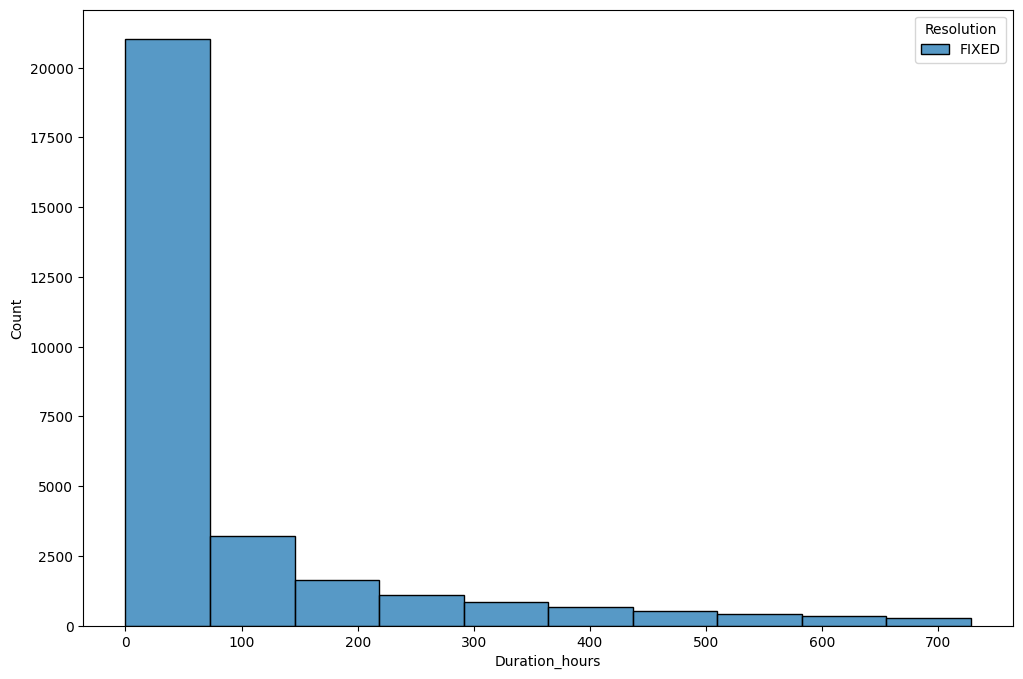

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the distribution with different bars for each resolution
plt.figure(figsize=(12, 8))

# Use seaborn to plot the histogram with hue for the resolution column
sns.histplot(data=df, x='Duration_hours', hue='Resolution', multiple='stack', bins=10, edgecolor='black')

# Calculate percentages for each bin
bin_counts, bin_edges = np.histogram(df['Duration_hours'], bins=10)
total_count = len(df)
percentages = (bin_counts / total_count) * 100

# Add percentages as annotations
for i in range(len(bin_counts)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i]) / 2, bin_counts[i] + 0.5, f'{percentages[i]:.1f}%', fontsize=10, ha='center')

plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration_hours with Percentages and Resolution Categories')
plt.grid(True)
plt.legend(title='Resolution')
plt.show()


In [9]:
df['Duration_hours']=df['Duration_hours']/24

/tmp/ipykernel_176350/3719861780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_hours']=df['Duration_hours']/24


NameError: name 'np' is not defined

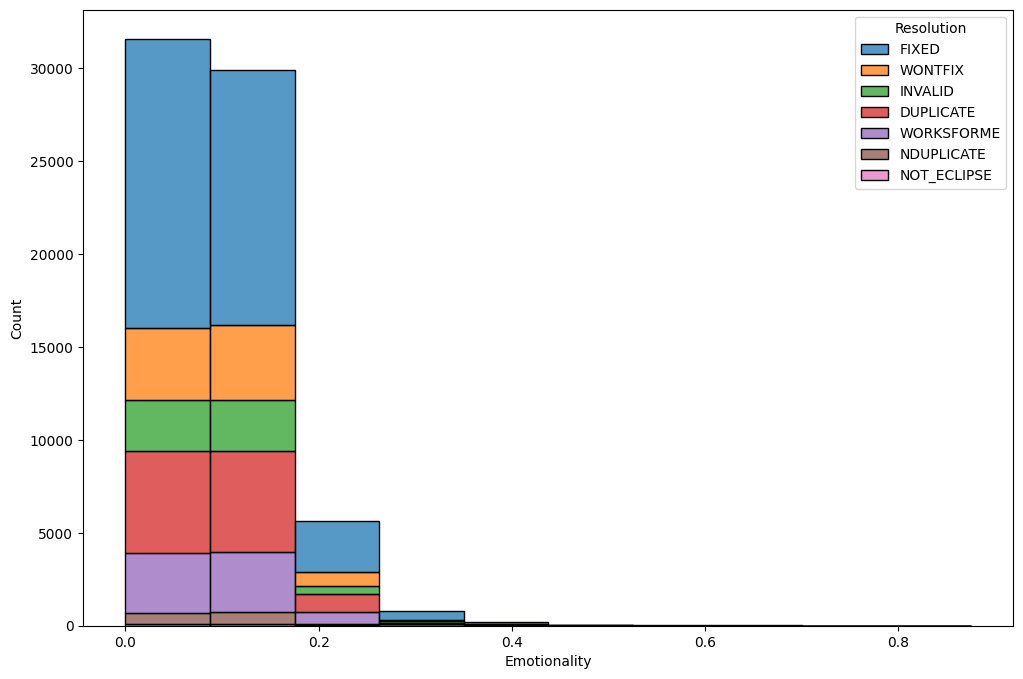

In [20]:


# Plotting the distribution with different bars for each resolution
plt.figure(figsize=(12, 8))

# Use seaborn to plot the histogram with hue for the resolution column
sns.histplot(data=df, x='Emotionality', hue='Resolution', multiple='stack', bins=10, edgecolor='black')

# Calculate percentages for each bin
bin_counts, bin_edges = np.histogram(df['Duration_hours'], bins=10)
total_count = len(df)
percentages = (bin_counts / total_count) * 100

# Add percentages as annotations
for i in range(len(bin_counts)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i]) / 2, bin_counts[i] + 0.5, f'{percentages[i]:.1f}%', fontsize=10, ha='center')

plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration_hours with Percentages and Resolution Categories')
plt.grid(True)
plt.legend(title='Resolution')
plt.show()